# Курсовой проект Есевой С.Е.

## Импорт необходимых библиотек

In [69]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Обзор датасетов

In [70]:
TRAIN_DATASET_PATH = '/Users/sofaeseva/Desktop/train.csv'
TEST_DATASET_PATH = '/Users/sofaeseva/Desktop/test.csv'

In [71]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [72]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [73]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [75]:
def reduce_mem_usage(train_df):
  start_mem = train_df.memory_usage().sum() / 1024**2
  print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
  
  for col in train_df.columns:
    col_type = train_df[col].dtype
    
    if col_type != object:
      c_min = train_df[col].min()
      c_max = train_df[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          train_df[col] = train_df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          train_df[col] = train_df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          train_df[col] = train_df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          train_df[col] = train_df[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          train_df[col] = train_df[col].astype(np.float32)     
        else:
          train_df[col] = train_df[col].astype(np.float64)
    else:
      train_df[col] = train_df[col].astype('category')
  
  end_mem = train_df.memory_usage().sum() / 1024**2
  print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
  
  return train_df

In [76]:
train_df = reduce_mem_usage(train_df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


## Обработка данных

Удаление неинформативных данных

In [77]:
train_df = train_df.drop('Id', axis = 1)

Работа над параметрами: DistrictID. По распределению видим, что много нулей, заменим их на медиану и применим то же самое на тесте

In [78]:
print(train_df['DistrictId'].mode(), train_df['DistrictId'].median())

0    27
dtype: int16 36.0


In [79]:
train_df['DistrictId'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

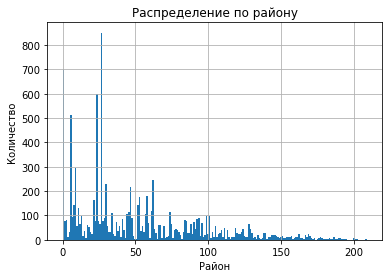

In [80]:
train_df['DistrictId'].hist(bins = 200)
plt.ylabel('Количество')
plt.xlabel('Район')
plt.title('Распределение по району')
plt.show()

In [81]:
median_district = train_df['DistrictId'].median()
train_df.loc[(train_df.DistrictId == 0), 'DistrictId'] = median_district
median_district

36.0

In [82]:
test_df.loc[(test_df.DistrictId == 0), 'DistrictId'] = median_district

In [83]:
train_df['DistrictId'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Оценим параметр Rooms и заменим на медиану выбросы (ноль и более 6 комнат) на трейне и тесте.

In [84]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [85]:
median_rooms = train_df['Rooms'].median()
train_df.loc[((train_df.Rooms > 6) | (train_df.Rooms == 0)), 'Rooms'] = median_rooms

In [86]:
train_df['Rooms'].value_counts()

2.0    3891
1.0    3705
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

In [87]:
test_df.loc[((test_df.Rooms > 6) | (test_df.Rooms == 0)), 'Rooms'] = median_rooms

Изучим площади квартир с помощью боксплота. Заменим выбросы на медиану.

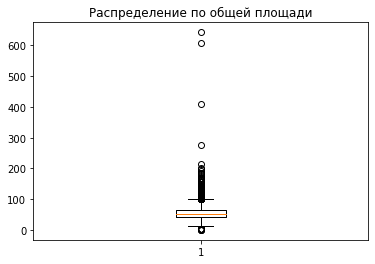

In [88]:
plt.boxplot(train_df['Square'])
plt.title('Распределение по общей площади')
plt.show()

In [89]:
median_square = train_df['Square'].median()
upper_quartile = np.percentile(train_df['Square'], 75)
lower_quartile = np.percentile(train_df['Square'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = train_df['Square'][train_df['Square'] <= upper_quartile + 1.5*iqr].max()
lower_whisker = train_df['Square'][train_df['Square'] >= lower_quartile - 1.5*iqr].min()
print(median_square, upper_whisker, lower_whisker)

52.513309478759766 102.05696868896484 13.78486442565918


In [90]:
train_df.loc[(train_df.Square > upper_whisker) | 
              (train_df.Square < lower_whisker), 
               'Square']= median_square
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.573600,1.888800,54.654530,37.199665,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,43.458595,0.812107,15.859586,86.241219,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,1.000000,1.000000,13.784864,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,21.000000,1.000000,41.794393,22.769833,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,75.000000,2.000000,64.682945,45.128803,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,209.000000,6.000000,102.056969,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [91]:
test_df.loc[(test_df.Square > upper_whisker) | 
              (test_df.Square < lower_whisker), 
               'Square']= median_square

Параметры жилой площади: нули заменим на медиану. В случаях, когда жилая площади слишком мала (менее 5) или когда жилая площадь больше общей площади квартиры, заменим значения на 0,5 от общей плозади квартиры (примерное значение жилой площади в реальной жизни)

In [92]:
median_lifesquare = train_df['LifeSquare'].median()
train_df.loc[(train_df['LifeSquare'].isnull()), 'LifeSquare'] = median_lifesquare
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.573600,1.888800,54.654530,36.266029,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,43.458595,0.812107,15.859586,76.609962,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,1.000000,1.000000,13.784864,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,21.000000,1.000000,41.794393,25.527400,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,75.000000,2.000000,64.682945,41.427234,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,209.000000,6.000000,102.056969,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [93]:
test_df.loc[(test_df['LifeSquare'].isnull()), 'LifeSquare'] = median_lifesquare

In [94]:
sum(train_df['LifeSquare'] > train_df['Square'])

641

In [95]:
sum(train_df['KitchenSquare'] > train_df['Square'])

7

In [96]:
train_df.loc[(train_df['LifeSquare'] > train_df['Square']) | (train_df['LifeSquare'] < 5),
               'LifeSquare'] = 0.5 * train_df['Square']

In [97]:
test_df.loc[(test_df['LifeSquare'] > test_df['Square']) | (test_df['LifeSquare'] < 5),
               'LifeSquare'] = 0.5 * test_df['Square']

По аналогии проработаем площадь кухни

In [98]:
train_df.loc[(train_df['KitchenSquare'] < 3), 'KitchenSquare'] = 0.2 * train_df['Square']

In [99]:
test_df.loc[(test_df['KitchenSquare'] < 3), 'KitchenSquare'] = 0.2 * test_df['Square']

In [100]:
train_df.loc[(train_df['KitchenSquare'] > train_df['Square']) | (train_df['KitchenSquare'] == 0),
               'KitchenSquare'] = 0.2 * train_df['Square']

In [101]:
test_df.loc[(test_df['KitchenSquare'] > test_df['Square']) | (test_df['KitchenSquare'] == 0),
               'KitchenSquare'] = 0.2 * test_df['Square']

In [102]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.573600,1.888800,54.654530,33.421711,9.241938,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,43.458595,0.812107,15.859586,12.023924,3.993909,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,1.000000,1.000000,13.784864,5.005477,3.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,21.000000,1.000000,41.794393,24.465603,7.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,36.000000,2.000000,52.513309,32.781261,8.805781,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,75.000000,2.000000,64.682945,37.600353,10.502662,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,209.000000,6.000000,102.056969,99.970062,96.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


Заменим нулевую этажность и случаи, когда этажность дома меньше этажа квартиры на медиану. 

In [103]:
median_housefloor = train_df['HouseFloor'].median()
train_df.loc[(train_df['HouseFloor'] == 0),
               'HouseFloor'] = median_housefloor

In [104]:
test_df.loc[(test_df['HouseFloor'] == 0),
               'HouseFloor'] = median_housefloor

In [105]:
train_df.loc[(train_df['Floor'] > train_df['HouseFloor']) | (train_df['HouseFloor'].isnull()),
               'HouseFloor'] = median_housefloor

In [106]:
test_df.loc[(test_df['Floor'] > test_df['HouseFloor']) | (test_df['HouseFloor'].isnull()),
               'HouseFloor'] = median_housefloor

In [107]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.573600,1.888800,54.654530,33.421711,9.241938,8.526700,13.853100,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,43.458595,0.812107,15.859586,12.023924,3.993909,5.241148,5.439627,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,1.000000,1.000000,13.784864,5.005477,3.000000,1.000000,1.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,21.000000,1.000000,41.794393,24.465603,7.000000,4.000000,10.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,36.000000,2.000000,52.513309,32.781261,8.805781,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,75.000000,2.000000,64.682945,37.600353,10.502662,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,209.000000,6.000000,102.056969,99.970062,96.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


Заменим выбросы в параметре года постройки дома на медиану

In [108]:
train_df['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [109]:
train_df.loc[(train_df['HouseYear'] < 1910)|(train_df['HouseYear'] > 2020)|(train_df.HouseYear.isnull()), 
             'HouseYear'] = train_df['HouseYear'].median()

In [110]:
test_df.loc[(test_df['HouseYear'] < 1910)|(test_df['HouseYear'] > 2020)|(test_df.HouseYear.isnull()), 
             'HouseYear'] = train_df['HouseYear'].median()

In [111]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.573600,1.888800,54.654530,33.421711,9.241938,8.526700,13.853100,1984.863800,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,43.458595,0.812107,15.859586,12.023924,3.993909,5.241148,5.439627,18.409979,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,1.000000,1.000000,13.784864,5.005477,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,21.000000,1.000000,41.794393,24.465603,7.000000,4.000000,10.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,36.000000,2.000000,52.513309,32.781261,8.805781,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,75.000000,2.000000,64.682945,37.600353,10.502662,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,209.000000,6.000000,102.056969,99.970062,96.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


Изучим параметр Ecology_1 и уберем выбросы

In [112]:
train_df['Ecology_1'].value_counts()

0.007122    587
0.000000    537
0.243205    511
0.072158    486
0.075779    346
           ... 
0.386772      6
0.011320      3
0.394094      2
0.012522      1
0.014334      1
Name: Ecology_1, Length: 129, dtype: int64

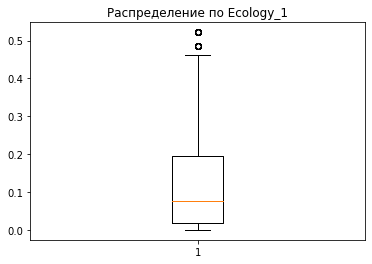

In [113]:
plt.boxplot(train_df['Ecology_1'])
plt.title('Распределение по Ecology_1')
plt.show()

In [120]:
median_ecology_1 = train_df['Ecology_1'].median()
upper_quartile = np.percentile(train_df['Ecology_1'], 75)
lower_quartile = np.percentile(train_df['Ecology_1'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = train_df['Ecology_1'][train_df['Ecology_1'] <= upper_quartile + 1.5*iqr].max()
                                      
train_df.loc[(train_df['Ecology_1'] > upper_whisker), 'Ecology_1'] = median_ecology_1

In [121]:
test_df.loc[(test_df['Ecology_1'] > upper_whisker), 'Ecology_1'] = median_ecology_1

Изучим параметры Social_1, 3, 3 и уберем выбросы

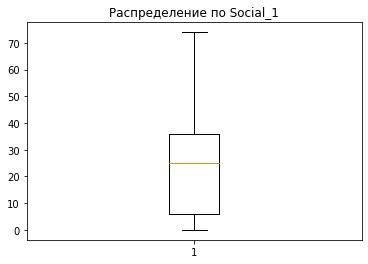

In [122]:
plt.boxplot(train_df['Social_1'])
plt.title('Распределение по Social_1')
plt.show()

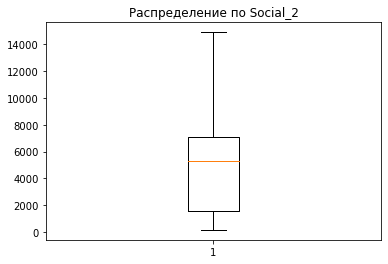

In [123]:
plt.boxplot(train_df['Social_2'])
plt.title('Распределение по Social_2')
plt.show()

In [124]:
median_social_2 = train_df['Social_2'].median()
upper_quartile = np.percentile(train_df['Social_2'], 75)
lower_quartile = np.percentile(train_df['Social_2'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = train_df['Social_2'][train_df['Social_2'] <= upper_quartile + 1.5*iqr].max()

train_df.loc[(train_df['Social_2'] > upper_whisker), 
               'Social_2'] = median_social_2

In [125]:
test_df.loc[(test_df['Social_2'] > upper_whisker), 
               'Social_2'] = median_social_2

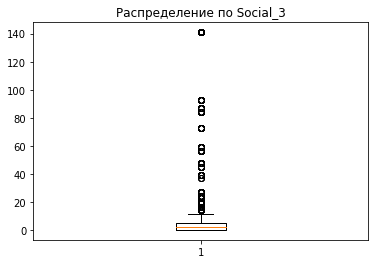

In [126]:
plt.boxplot(train_df['Social_3'])
plt.title('Распределение по Social_3')
plt.show()

In [128]:
median_social_3 = train_df['Social_3'].median()
upper_quartile = np.percentile(train_df['Social_3'], 75)
lower_quartile = np.percentile(train_df['Social_3'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = train_df['Social_3'][train_df['Social_3'] <= upper_quartile + 1.5*iqr].max()

train_df.loc[(train_df['Social_3'] > upper_whisker), 
               'Social_3'] = median_social_3

In [129]:
test_df.loc[(test_df['Social_3'] > upper_whisker), 
               'Social_3'] = median_social_3

In [130]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.573600,1.888800,54.654530,33.421711,9.241938,8.526700,13.853100,1984.863800,0.115020,24.687000,5109.312600,2.378400,1142.904419,1.319500,4.231300,214138.937500
std,43.458595,0.812107,15.859586,12.023924,3.993909,5.241148,5.439627,18.409979,0.113479,17.532614,3560.474465,2.652078,1021.519470,1.493601,4.806341,92872.273438
min,1.000000,1.000000,13.784864,5.005477,3.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,21.000000,1.000000,41.794393,24.465603,7.000000,4.000000,10.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,36.000000,2.000000,52.513309,32.781261,8.805781,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,75.000000,2.000000,64.682945,37.600353,10.502662,12.000000,17.000000,2001.000000,0.194489,36.000000,7065.000000,4.000000,1548.000000,2.000000,6.000000,249135.460938
max,209.000000,6.000000,102.056969,99.970062,96.000000,42.000000,117.000000,2020.000000,0.458174,74.000000,14892.000000,11.000000,4849.000000,6.000000,23.000000,633233.437500


'Healthcare_1' -  половина значений пропущена, не будем брать этот признак для обучения

In [131]:
feat = ['Rooms', 'Square', 'LifeSquare', 'DistrictId', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
        'Ecology_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1']
x = train_df[feat]
y = train_df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21)

In [132]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [133]:
train_pred = forest.predict(x_train)
test_pred = forest.predict(x_test)

In [134]:
r2(y_train, train_pred)

0.9584022105184561

In [135]:
r2(y_test, test_pred)

0.7378093028059798

In [ ]:
Итоговое предсказание

In [139]:
forest = RandomForestRegressor()
forest.fit(x, y)

RandomForestRegressor()

In [140]:
itog_test = test_df[feat]
itog_test = itog_test.fillna(0)
pred = pd.DataFrame(forest.predict(itog_test), columns=['pred'])
pred

,pred
0,158989.638125
1,122046.660391
2,135618.085703
3,136137.499141
4,245387.987266
...,...
4995,182905.277344
4996,405021.756094
4997,146396.348281
4998,190277.453437


In [141]:
pred.to_csv('Eseva_predict.csv')